<a href="https://colab.research.google.com/github/mikful/launchpad-tsunami-mitigation/blob/main/nbs/1-Initial-Investigations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tsunami Mitigation Initial Investigation


## Cochard et. al, 2008. The 2004 tsunami in Aceh and Southern Thailand: A review on coastal ecosystems, wave hazards and vulnerability.


p. 25

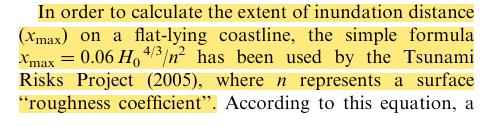

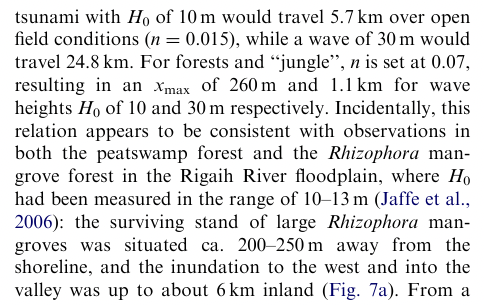


Note: These are for flat-lying coastline, therefore take no account of bathymetry/topography, embankments etc.


In [ ]:
def xmax(H0, n):
    """
    Function to calculate xmax (inundation distance) for flat lying coastline, 
    using Tsunami Risks Project (2005) formula.

    :parameter:  H0, flow depth at the coastline of tsunami (m)
    :parameter:  n, surface "roughness coefficient" (open field = 0.015, jungle = 0.07)

    :returns:  xmax (inundation distance, m)
    """
    return round(0.06 * (H0**(4/3) / n**2))

In [ ]:
xmax(10, 0.07)

264

In [ ]:
print(f"xmax for 10m H0, n jungle:  {xmax(10, 0.07)}m") 
print(f"xmax for 30m H0, n jungle:  {xmax(30, 0.07)}m") 

xmax for 10m H0, n jungle:  264m
xmax for 30m H0, n jungle:  1141m


We can calculate some $x_{max}$ values for different H0 values and plot these:

In [ ]:
#  function to calc xmax for H0 range for n
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def calc_range_H0(start_H0, end_H0, n):
    """
    Function to calculate xmax (inundation distance) for a range of H0 flat lying coastline, 
    using Tsunami Risks Project (2005) formula.

    :parameter:  start_H0, smallest flow depth at the coastline of tsunami (m) for range
    :parameter:  end_H0, largest flow depth at the coastline of tsunami (m) for range
    :parameter:  n, surface "roughness coefficient" (open field = 0.015, jungle = 0.07)

    :returns:  pandas df of H0 and xmax
    """

    xmax_range = []

    H0_range = np.arange(start_H0, end_H0, 0.5)
    data = {'H0 (m)': list(H0_range), 
            'xmax (m)': [xmax(H0,n) for H0 in H0_range]}

    df = pd.DataFrame(data)

    return df.set_index("H0 (m)")

### "Jungle" roughness coefficient 0.07

In [ ]:
# calculate for "jungle" roughness coefficient
df = calc_range_H0(start_H0=1, end_H0=30, n=0.07)
df

,xmax (m)
H0 (m),
1.0,12
1.5,21
2.0,31
2.5,42
3.0,53
3.5,65
4.0,78
4.5,91
5.0,105


,xmax (m)
H0 (m),
1.0,12
1.5,21
2.0,31
2.5,42
3.0,53
3.5,65
4.0,78
4.5,91
5.0,105


Text(0.5, 1.0, 'xmax for H0 range with n=0.07 (jungle)')

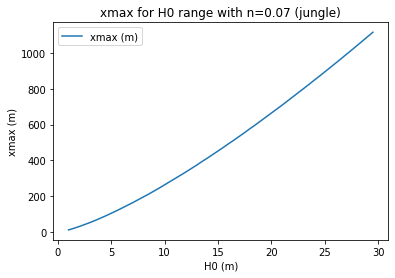

In [ ]:
ax = df.plot()
ax.set_ylabel("xmax (m)")
ax.set_title("xmax for H0 range with n=0.07 (jungle)")

**Best case - lateral wave, 400m deep bioshield**

This suggests that with thick "jungle" or mangrove (Rhizophora as per the paper) coverage a 400m deep bioshield could protect up to 13m waves.

**Worst case - direct hit wave, 20m deep bioshield**

This suggests a 20m bioshield of the same roughness coefficient could protect up to 1m to 1.5m waves.


### "open field" roughness coefficient 0.07

We can also calculate for the values given for "open field", which naturally gives significantly less protection.

In [ ]:
# calculate for "open field" roughness coefficient
df = calc_range_H0(start_H0=1, end_H0=30, n=0.015)
df

,xmax (m)
H0 (m),
1.0,267
1.5,458
2.0,672
2.5,905
3.0,1154
3.5,1417
4.0,1693
4.5,1981
5.0,2280


Text(0.5, 1.0, 'xmax for H0 range with n=0.015 (open-field)')

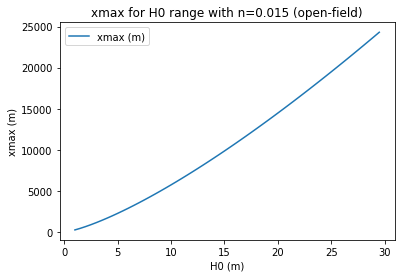

In [ ]:
ax = df.plot()
ax.set_ylabel("xmax (m)")
ax.set_title("xmax for H0 range with n=0.015 (open-field)")